# $Feature$ $Engineering$

In [156]:
import numpy as np
import pandas as pd
import wrangle as w
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
import seaborn as sns
from sklearn.linear_model import LinearRegression
from pydataset import data

# 1. Load the tips dataset.

In [231]:
tips = sns.load_dataset('tips')

In [232]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [233]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [234]:
tips.rename(columns={'size': 'table_size'},inplace=True)

In [235]:
train, validate, test = w.split_data(tips)

In [236]:
train.head()

,total_bill,tip,sex,smoker,day,time,table_size
18,16.97,3.50,Female,No,Sun,Dinner,3
172,7.25,5.15,Male,Yes,Sun,Dinner,2
118,12.43,1.80,Female,No,Thur,Lunch,2
28,21.70,4.30,Male,No,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2


In [237]:
# It is a good idea to list categorical and numerical columns
cat_cols = ['sex','smoker','day','time']
num_cols = ['total_bill', 'size']
# you can use num_cols.append('new_colum') to add new columns

In [238]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 18 to 166
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  136 non-null    float64 
 1   tip         136 non-null    float64 
 2   sex         136 non-null    category
 3   smoker      136 non-null    category
 4   day         136 non-null    category
 5   time        136 non-null    category
 6   table_size  136 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 5.3 KB


## * a) Create a column named price_per_person. This should be the total bill divided by the party size.


In [239]:
train['price_per_person']= (train.total_bill)/(train.table_size)
validate['price_per_person']= (validate.total_bill)/(validate.table_size)
test['price_per_person']= (test.total_bill)/(test.table_size)

In [240]:
##### not sure when to scale here

train, validate, test = w.scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['total_bill', 'tip', 'table_size','price_per_person'])

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (136). n_quantiles is set to n_samples.
  warnings.warn(


In [241]:
train.head()

,total_bill,tip,sex,smoker,day,time,table_size,price_per_person
18,0.009284,0.680329,Female,No,Sun,Dinner,0.668674,-0.692077
172,-2.286548,1.446104,Male,Yes,Sun,Dinner,-0.370364,-2.009875
118,-0.789826,-0.789826,Female,No,Thur,Lunch,-0.370364,-0.390325
28,0.622926,1.093728,Male,No,Sat,Dinner,-0.370364,1.302948
237,1.395175,-1.886265,Male,Yes,Sat,Dinner,-0.370364,2.009875


In [242]:
train.columns.to_list()

['total_bill',
 'tip',
 'sex',
 'smoker',
 'day',
 'time',
 'table_size',
 'price_per_person']

In [243]:
train

,total_bill,tip,sex,smoker,day,time,table_size,price_per_person
18,0.009284,0.680329,Female,No,Sun,Dinner,0.668674,-0.692077
172,-2.286548,1.446104,Male,Yes,Sun,Dinner,-0.370364,-2.009875
118,-0.789826,-0.789826,Female,No,Thur,Lunch,-0.370364,-0.390325
28,0.622926,1.093728,Male,No,Sat,Dinner,-0.370364,1.302948
237,1.395175,-1.886265,Male,Yes,Sat,Dinner,-0.370364,2.009875
207,1.786156,0.205685,Male,Yes,Sat,Dinner,1.201313,1.012893
183,0.740067,1.833915,Male,Yes,Sun,Dinner,1.201313,-0.600537
60,0.430727,0.451191,Male,Yes,Sat,Dinner,-0.370364,1.110772
41,0.083652,-0.065032,Male,No,Sun,Dinner,-0.370364,0.600537
160,0.578446,0.680329,Male,No,Sun,Dinner,1.201313,-0.868382


In [244]:
            def dummy_variables(df, feature_list): 
    ''' dummy_variables '''
    
    # creates dummy variable
    dummy_df = pd.get_dummies(df[feature_list], dummy_na=False)

    
    # Concatenate dummy_df to original data frame
    df = pd.concat([df, dummy_df], axis=1)
    
    # drops redundant columns(non-dummy variables)
    df = df.drop(columns=feature_list)
    
    return df

In [245]:
train = dummy_variables(train, ['sex','smoker','day','time'])

In [246]:
train.head()

,total_bill,tip,table_size,price_per_person,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
18,0.009284,0.680329,0.668674,-0.692077,0,1,0,1,0,0,0,1,0,1
172,-2.286548,1.446104,-0.370364,-2.009875,1,0,1,0,0,0,0,1,0,1
118,-0.789826,-0.789826,-0.370364,-0.390325,0,1,0,1,1,0,0,0,1,0
28,0.622926,1.093728,-0.370364,1.302948,1,0,0,1,0,0,1,0,0,1
237,1.395175,-1.886265,-0.370364,2.009875,1,0,1,0,0,0,1,0,0,1


In [247]:
train.columns.to_list()

['total_bill',
 'tip',
 'table_size',
 'price_per_person',
 'sex_Male',
 'sex_Female',
 'smoker_Yes',
 'smoker_No',
 'day_Thur',
 'day_Fri',
 'day_Sat',
 'day_Sun',
 'time_Lunch',
 'time_Dinner']

In [248]:
X_train, y_train = train[['total_bill',

 'table_size',
 'price_per_person',
 'sex_Male',
 'sex_Female',
 'smoker_Yes',
 'smoker_No',
 'day_Thur',
 'day_Fri',
 'day_Sat',
 'day_Sun',
 'time_Lunch',
 'time_Dinner']], train.tip


## * b) Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?


### I think  total_bill and time of day would be the best features to predict tip amount.

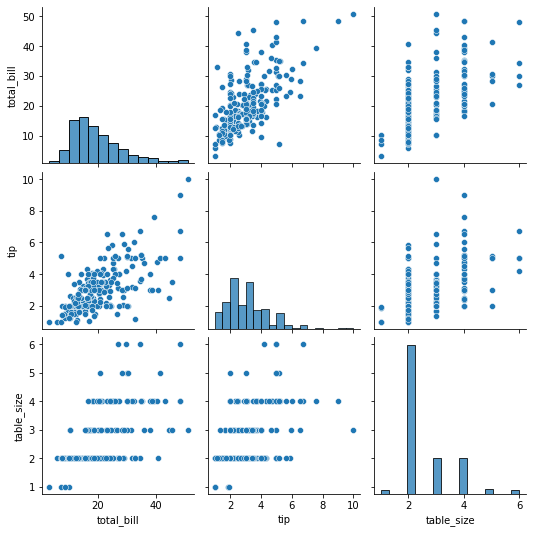

In [249]:
# pair plots is a good way to get a first look into data correlation
sns.pairplot(data= tips)

In [250]:
# look into correlation of variables
tips.corr()

,total_bill,tip,table_size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
table_size,0.598315,0.489299,1.000000


## * c) Use select k best to select the top 2 features for predicting tip amount. What are they?


In [251]:
X_train.dtypes

total_bill          float64
table_size          float64
price_per_person    float64
sex_Male              uint8
sex_Female            uint8
smoker_Yes            uint8
smoker_No             uint8
day_Thur              uint8
day_Fri               uint8
day_Sat               uint8
day_Sun               uint8
time_Lunch            uint8
time_Dinner           uint8
dtype: object

In [252]:
#create model
kbest = SelectKBest(f_regression , k =2)

In [253]:
# fit 
_ = kbest.fit(X_train, y_train)

In [254]:
# statistical f-value
kbest.scores_

array([1.40635281e+02, 5.97755754e+01, 2.35769843e+01, 1.43073207e+00,
       1.43073207e+00, 5.29372875e-01, 5.29372875e-01, 3.26871429e-01,
       3.85730391e-02, 1.11004949e+00, 3.09598016e+00, 4.81142893e-01,
       4.81142893e-01])

In [255]:
#p value: 
kbest.pvalues_

array([1.25679366e-22, 2.25456056e-12, 3.29234518e-06, 2.33757218e-01,
       2.33757218e-01, 4.68139988e-01, 4.68139988e-01, 5.68464934e-01,
       8.44594487e-01, 2.93967271e-01, 8.07680305e-02, 4.89105742e-01,
       4.89105742e-01])

In [256]:
# Back to DataFrame
kbest_results = pd.DataFrame(
    dict(p=kbest.pvalues_, f=kbest.scores_),
                             index = X_train.columns)
kbest_results

,p,f
total_bill,1.256794e-22,140.635281
table_size,2.254561e-12,59.775575
price_per_person,3.292345e-06,23.576984
sex_Male,2.337572e-01,1.430732
sex_Female,2.337572e-01,1.430732
smoker_Yes,4.681400e-01,0.529373
smoker_No,4.681400e-01,0.529373
day_Thur,5.684649e-01,0.326871
day_Fri,8.445945e-01,0.038573
day_Sat,2.939673e-01,1.110049


In [257]:
X_train.columns[kbest.get_support()]

Index(['total_bill', 'table_size'], dtype='object')

In [258]:
kbest.transform(X_train)[:5]

array([[ 0.00928394,  0.66867361],
       [-2.28654795, -0.37036424],
       [-0.78982559, -0.37036424],
       [ 0.62292572, -0.37036424],
       [ 1.39517537, -0.37036424]])

In [259]:
X_train_transformed = pd.DataFrame(
    kbest.transform(X_train),
    columns=X_train.columns[kbest.get_support()],
    index=X_train.index
)
X_train_transformed.head()

,total_bill,table_size
18,0.009284,0.668674
172,-2.286548,-0.370364
118,-0.789826,-0.370364
28,0.622926,-0.370364
237,1.395175,-0.370364


```python
#### make the thing
kbest = SelectKBest(f_regression, k=2)
#### fit the thing
_ = kbest.fit(X_train, y_train)
### statistical f-value:
kbest.scores_
#p value: 
kbest.pvalues_
kbest_results = pd.DataFrame(
    dict(p=kbest.pvalues_, f=kbest.scores_),
                             index = X_train.columns)
kbest_results
### get-support() will output a boolean mask to tell me which features were selected
### we can apply this mask to the columns in our original dataframe
X_train.columns[kbest.get_support()]
### kbest transform will convert our information to the selected feature subspace
### ****buuuuuut, its just a numpy array
kbest.transform(X_train)[:5]
X_train_transformed = pd.DataFrame(
    kbest.transform(X_train),
    columns=X_train.columns[kbest.get_support()],
    index=X_train.index
)
X_train_transformed.head(3)
```

## * d) Use recursive feature elimination to select the top 2 features for tip amount. What are they?


In [260]:
model = LinearRegression()

In [261]:
# create model
rfe = RFE(model, n_features_to_select=2)

In [262]:
# fit model
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=2)

In [263]:
# columns ranked 1 will be selected as top models
rfe.ranking_

array([ 1,  3,  8,  6, 10, 11, 12,  5,  1,  7,  2,  4,  9])

In [264]:
# covert do dataframe for readability
rfe_rank= pd.DataFrame(
{
    'rfe_ranking': rfe.ranking_
},index = X_train.columns)
rfe_rank.sort_values(by='rfe_ranking')


,rfe_ranking
total_bill,1
day_Fri,1
day_Sun,2
table_size,3
time_Lunch,4
day_Thur,5
sex_Male,6
day_Sat,7
price_per_person,8
time_Dinner,9


In [265]:
rfe.get_support()

array([ True, False, False, False, False, False, False, False,  True,
       False, False, False, False])

In [266]:
# converted the selected features to a dataframe
X_train_transformed = pd.DataFrame(
rfe.transform(X_train),
index = X_train.index,
columns = X_train.columns[rfe.support_])
X_train_transformed.head()

,total_bill,day_Fri
18,0.009284,0.0
172,-2.286548,0.0
118,-0.789826,0.0
28,0.622926,0.0
237,1.395175,0.0


In [267]:
rfe_columns = X_train.columns[rfe.support_].tolist()
rfe_columns

['total_bill', 'day_Fri']

```python
# make a model object to use in RFE process.
# The model is here to give us metrics on feature importance and model score
# allowing us to recursively reduce the number of features to reach our desired space
model = LinearRegression()

# make thing
rfe = RFE(model, n_features_to_select=2)
# fit thing
rfe.fit(X_train, y_train)

rfe.ranking_

pd.DataFrame(
{
    'rfe_ranking': rfe.ranking_
},index = X_train.columns)

rfe.get_support()

X_train_transformed = pd.DataFrame(
rfe.transform(X_train),
index = X_train.index,
columns = X_train.columns[rfe.support_])

X_train_transformed.head()
```

## * e) Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features you are selecting?

### The algorithm that is used places weight on the features. For example Kbest does not put consider feature interactions. As I increased the number of features selected my top two features have remain in the list for Kbest; for recursive the ranking changes as number of features selected increased.

# 2. Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [270]:
def select_Kbest(X, y, k=2):
    '''
    select_Kbest takes in :
    X: a dataframe representing numerical independent features
    y: a pandas Series representing a target variable
    k: a keyword argument defaulted to 2 for the number of features
    
    returns: a list of the selected features using SelectBest 
    '''
    # model
    kbest = SelectKBest(f_regression, k=k)
    # fit
    kbest.fit(X, y)
    # mask of selection
    feature_mask = kbest.get_support()
    rank = X.columns[feature_mask]
    
    # convert to list
    rank = rank.to_list()


    return f'TOP {k} features: {rank}'

In [272]:
select_Kbest(X_train, y_train, 3)

"TOP 3 features: ['total_bill', 'table_size', 'price_per_person']"

# 3. Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.


In [282]:
def rfe(X, y, k=2):
    ''' 
    rfe takes in:
    X: a dataframe representing numerical independent features
    y: a pandas Series representing a target variable
    k: a keyword argument defaulted to 2 for the number of features
    
    returns: a list of the selected features using RFE
    '''
    # Model
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select= k)
    #fit
    rfe.fit(X, y)
    # mask selection
    mask = rfe.get_support()
    
    return X.columns[mask]

In [283]:
rfe(X_train, y_train, 3)

Index(['total_bill', 'day_Fri', 'day_Sun'], dtype='object')

In [284]:
def rfe_rank(X, y, k=2):
    ''' 
    rfe takes in:
    X: a dataframe representing numerical independent features
    y: a pandas Series representing a target variable
    k: a keyword argument defaulted to 2 for the number of features
    
    returns: a data frame that sorts top features using RFE
    '''    

    # Model
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select= k)
    #fit
    rfe.fit(X, y)
    # mask selection
    
    
    # convert to DF
    
    rfe_rank= pd.DataFrame(
    {
        'rfe_ranking': rfe.ranking_
    },index = X_train.columns)
    
    rfe_rank = rfe_rank.sort_values(by='rfe_ranking')
    
    return rfe_rank

# 4. Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both select k best and recursive feature elimination (use the functions you just built to help you out).

In [195]:
swiss = data ('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [196]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [197]:
swiss.describe().T

,count,mean,std,min,25%,50%,75%,max
Fertility,47.0,70.142553,12.491697,35.00,64.700,70.40,78.450,92.5
Agriculture,47.0,50.659574,22.711218,1.20,35.900,54.10,67.650,89.7
Examination,47.0,16.489362,7.977883,3.00,12.000,16.00,22.000,37.0
Education,47.0,10.978723,9.615407,1.00,6.000,8.00,12.000,53.0
Catholic,47.0,41.143830,41.704850,2.15,5.195,15.14,93.125,100.0
Infant.Mortality,47.0,19.942553,2.912697,10.80,18.150,20.00,21.700,26.6


In [198]:
swiss.columns.to_list()

['Fertility',
 'Agriculture',
 'Examination',
 'Education',
 'Catholic',
 'Infant.Mortality']

In [199]:
import sklearn.preprocessing
from sklearn.preprocessing import QuantileTransformer
def scale_one_df(train,columns_to_scale=[
                                     'Agriculture',
                                     'Examination',
                                     'Education',
                                     'Catholic',
                                     'Infant.Mortality']):    
    train_scaled = train.copy()
    scaler = sklearn.preprocessing.MinMaxScaler()

    scaler.fit(train[columns_to_scale])
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                      columns=train[columns_to_scale].columns.values).set_index([train.index.values])
    return train_scaled

In [200]:
import sklearn.preprocessing
from sklearn.preprocessing import QuantileTransformer
def scale_robust_df(train,columns_to_scale=[
                                     'Agriculture',
                                     'Examination',
                                     'Education',
                                     'Catholic',
                                     'Infant.Mortality']):    
    train_scaled = train.copy()
    scaler = QuantileTransformer(output_distribution='normal')

    scaler.fit(train[columns_to_scale])
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                      columns=train[columns_to_scale].columns.values).set_index([train.index.values])
    return train_scaled

In [201]:
mm_swiss = scale_one_df(swiss)

In [202]:
r_swiss = scale_robust_df(swiss)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (47). n_quantiles is set to n_samples.
  warnings.warn(


In [205]:
X_mmtrain, y_mmtrain = mm_swiss[['Agriculture',
                                     'Examination',
                                     'Education',
                                     'Catholic',
                                     'Infant.Mortality']],swiss.Fertility

In [206]:
X_rtrain, y_rtrain = r_swiss[['Agriculture',
                                     'Examination',
                                     'Education',
                                     'Catholic',
                                     'Infant.Mortality']],swiss.Fertility

In [214]:
select_Kbest(X_mmtrain, y_mmtrain, 3)

"TOP 3 features: ['Examination', 'Education', 'Catholic']"

In [213]:
select_Kbest(X_rtrain, y_rtrain, 3)

"TOP 3 features: ['Agriculture', 'Examination', 'Education']"

In [215]:
rfe(X_mmtrain, y_mmtrain, 3)

,rfe_ranking
Agriculture,1
Education,1
Infant.Mortality,1
Catholic,2
Examination,3


In [216]:
rfe(X_rtrain, y_rtrain, 3)

,rfe_ranking
Examination,1
Education,1
Infant.Mortality,1
Agriculture,2
Catholic,3
